In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/shyam/Downloads/Data1.csv', parse_dates=[0])

In [3]:
df.head()

,TIME,Sales,Inflation
0,2007-09-01,95.52058,2.414328
1,2007-10-01,95.37652,2.968873
2,2007-11-01,95.53848,3.513978
3,2007-12-01,94.97173,3.455396
4,2008-01-01,95.21674,3.622073


In [4]:
df.set_index('TIME', inplace=True)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

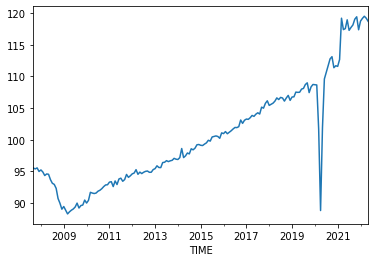

In [6]:
df['Sales'].plot()

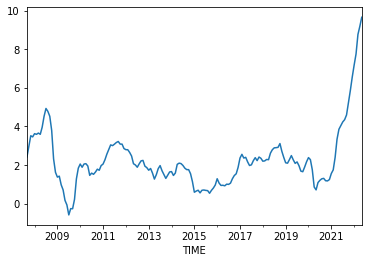

In [7]:
df['Inflation'].plot()

In [8]:
df.describe()

,Sales,Inflation
count,177.000000,177.000000
mean,100.560956,2.258188
std,8.287005,1.551097
min,88.261600,-0.589731
25%,94.500610,1.451779
50%,99.111710,2.006857
75%,106.215700,2.646380
max,119.518000,9.657443


In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df['Sales'])

ADF Test Statistic : 0.6065671963190327
p-value : 0.9877763856555005
#Lags Used : 4
Number of Observations Used : 172
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
adfuller_test(df['Inflation'])

ADF Test Statistic : -0.09213612374347109
p-value : 0.9502161947064862
#Lags Used : 13
Number of Observations Used : 163
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [17]:
df['Inflation First Difference' ]=df['Inflation'] - df['Inflation'].shift(1)

In [19]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -9.240279199169045
p-value : 1.5894197106745656e-15
#Lags Used : 3
Number of Observations Used : 172
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [20]:
adfuller_test(df['Inflation First Difference'].dropna())

ADF Test Statistic : -2.2603323961504262
p-value : 0.18508077308629084
#Lags Used : 12
Number of Observations Used : 163
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

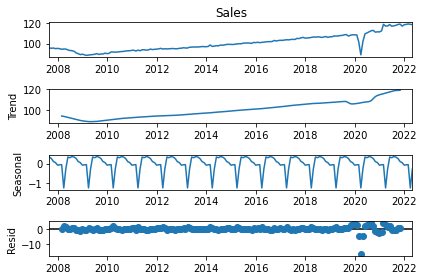

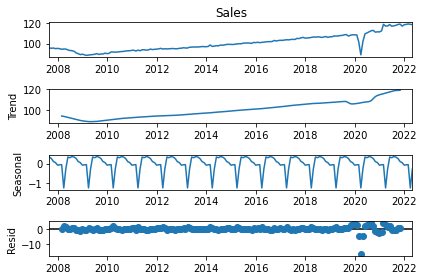

In [22]:
sd_sales=seasonal_decompose(df['Sales'], model='Additive')
sd_sales.plot()

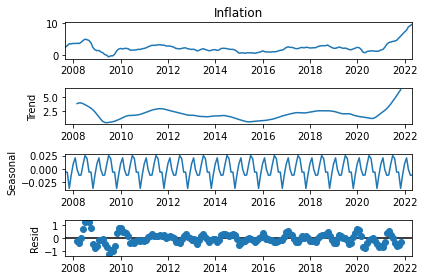

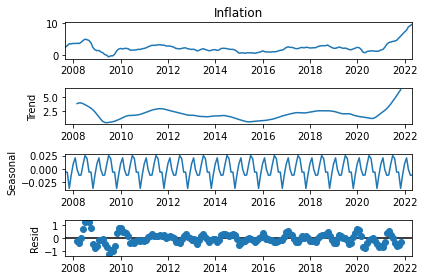

In [23]:
sd_inf=seasonal_decompose(df['Inflation'], model='Additive')
sd_inf.plot()

In [24]:
df['Sales Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


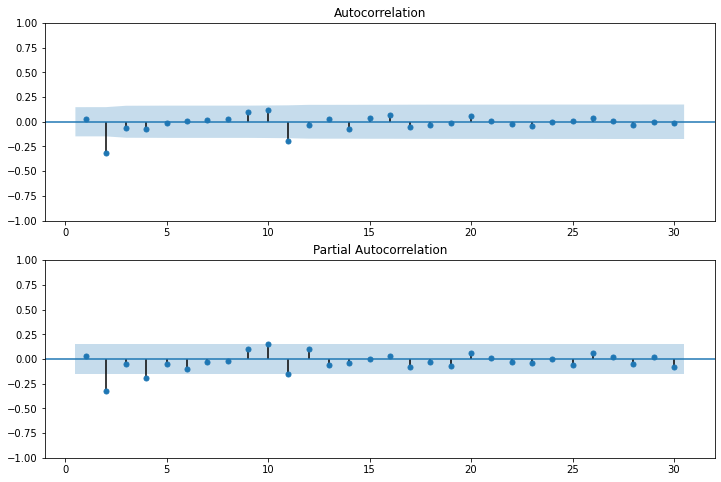

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
plot_acf(df['Sales First Difference'].dropna(),lags=30, zero=False, ax=ax1)

plot_pacf(df['Sales First Difference'].dropna(),lags=30, zero=False, ax=ax2)

plt.show()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


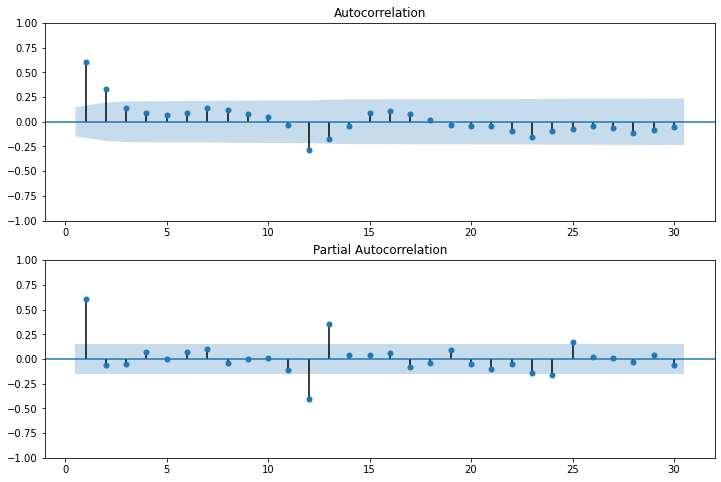

In [28]:
fig, (ax3, ax4) = plt.subplots(2,1, figsize=(12,8))
 
plot_acf(df['Inflation First Difference'].dropna(),lags=30, zero=False, ax=ax3)

plot_pacf(df['Inflation First Difference'].dropna(),lags=30, zero=False, ax=ax4)

plt.show()

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model_inf1 = SARIMAX(df['Inflation'], order=(0,1,1), seasonal_order=(1,1,1,12))
results_inf1 = model_inf1.fit()

results_inf1.summary()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Inflation   No. Observations:                  177
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -27.984
Date:                            Fri, 23 Sep 2022   AIC                             63.968
Time:                                    12:47:45   BIC                             76.368
Sample:                                09-01-2007   HQIC                            69.002
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5597      0.063      8.831      0.000       0.435       0.684
ar.S.L12      -0.4095      0.075     -5.440      0.000      -0.557      -0.262
ma.S.L12      -0.9288      0.228     -4.080      0.000      -1.375      -0.483
sigma2         0.0675      0.010      6.895      0.000       0.048       0.087
===================================================================================
Ljung-Box (L1) (Q):                   5.81   Jarque-Bera (JB):                16.18
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.00
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
mse_inf_sarima=np.mean(np.square(results_inf1.resid))
mse_inf_sarima

0.1528906313321882

In [32]:
results_inf1.forecast(12)

2022-06-01    9.931808
2022-07-01    9.900222
2022-08-01    9.878588
2022-09-01    9.789353
2022-10-01    9.602589
2022-11-01    9.388122
2022-12-01    9.171587
2023-01-01    9.017107
2023-02-01    8.843334
2023-03-01    8.524840
2023-04-01    8.409592
2023-05-01    8.282980
Freq: MS, Name: predicted_mean, dtype: float64

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [37]:
future_df=pd.concat([df,future_datest_df])

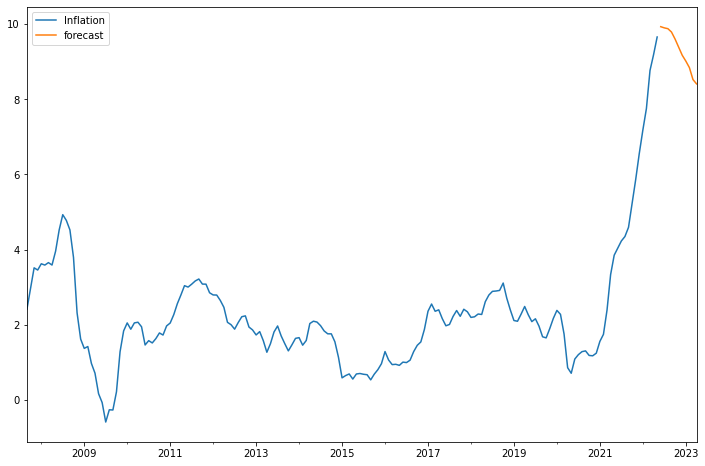

In [42]:
future_df['forecast'] = results_inf1.forecast(12)  
future_df[['Inflation', 'forecast']].plot(figsize=(12, 8)) 

In [43]:
future_df

,Sales,Inflation,Sales First Difference,Inflation First Difference,Sales Seasonal First Difference,forecast
2007-09-01,95.52058,2.414328,NaN,NaN,NaN,NaN
2007-10-01,95.37652,2.968873,-0.14406,0.554545,NaN,NaN
2007-11-01,95.53848,3.513978,0.16196,0.545104,NaN,NaN
2007-12-01,94.97173,3.455396,-0.56675,-0.058582,NaN,NaN
2008-01-01,95.21674,3.622073,0.24501,0.166677,NaN,NaN
...,...,...,...,...,...,...
2022-12-01,NaN,NaN,NaN,NaN,NaN,9.171587
2023-01-01,NaN,NaN,NaN,NaN,NaN,9.017107
2023-02-01,NaN,NaN,NaN,NaN,NaN,8.843334
2023-03-01,NaN,NaN,NaN,NaN,NaN,8.524840


In [44]:
df2=pd.DataFrame(results_inf1.forecast(12))

In [50]:
df2['Inflation']=df2['predicted_mean']

In [51]:
df=df.append(df2)

In [55]:
df_new=df.drop('predicted_mean', axis=1)

In [56]:
df_new

,Sales,Inflation,Sales First Difference,Inflation First Difference,Sales Seasonal First Difference
2007-09-01,95.52058,2.414328,NaN,NaN,NaN
2007-10-01,95.37652,2.968873,-0.14406,0.554545,NaN
2007-11-01,95.53848,3.513978,0.16196,0.545104,NaN
2007-12-01,94.97173,3.455396,-0.56675,-0.058582,NaN
2008-01-01,95.21674,3.622073,0.24501,0.166677,NaN
...,...,...,...,...,...
2023-01-01,NaN,9.017107,NaN,NaN,NaN
2023-02-01,NaN,8.843334,NaN,NaN,NaN
2023-03-01,NaN,8.524840,NaN,NaN,NaN
2023-04-01,NaN,8.409592,NaN,NaN,NaN


In [87]:
model_xreg=SARIMAX(df_new['Sales'].dropna(),order=(1, 1, 1),seasonal_order=(1,1,1,12), exog=df_new['Inflation'].iloc[0:177])
results_xreg=model_xreg.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [88]:
results_xreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  177
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -333.356
Date:                            Fri, 23 Sep 2022   AIC                            678.713
Time:                                    13:25:02   BIC                            697.312
Sample:                                09-01-2007   HQIC                           686.264
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Inflation      1.1867      0.556      2.134      0.033       0.097       2.277
ar.L1         -0.5854      0.216     -2.715      0.007      -1.008      -0.163
ma.L1          0.7551      0.208      3.638      0.000       0.348       1.162
ar.S.L12      -0.0558      0.097     -0.574      0.566      -0.247       0.135
ma.S.L12      -0.8498      0.086     -9.845      0.000      -1.019      -0.681
sigma2         3.0846      0.154     19.980      0.000       2.782       3.387
===================================================================================
Ljung-Box (L1) (Q):                   1.71   Jarque-Bera (JB):              8039.49
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):              17.70   Skew:                             1.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
results_xreg.forecast(12)

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [89]:
future_df['forecast_s'] = results_xreg.forecast(12)  
future_df[['Sales', 'forecast_s']].plot(figsize=(12, 8)) 

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.